In [1]:
import sympy as sy
import numpy as np
import sys
hdir = "/home/stefan/Arbeit/openEMS/metamaterials/python_scripts"
sys.path.append(hdir)
from tl_fit import residuals
from tl_fit import fit_func
#from sympy.functions import re as Re, im as Im
from scipy.optimize import differential_evolution
from matplotlib import pyplot as plt
#from sympy.abc import R, L, C, omega, f, Z, w, D
from sympy import init_printing
Zm, Zd, Z0, er, c0 = sy.symbols(["Zm","Zd","Z_0","epsilon_r", "c_0"])
init_printing() # doctest: +SKIP
i = sy.I
d = np.loadtxt("RLC_parameters.txt", delimiter=",")

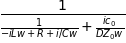

In [63]:
Zd = -i*Z0/sy.sqrt(er)*sy.tan(w*D/c0*sy.sqrt(er))
Zd = -i*D*Z0*w/c0
Zm = (1/(R - i*w*L + i/(w*C)) + 1/Zd)**(-1)
Zm

In [71]:
Im(sy.diff(Zm,w)).simplify()

Text(0.5,1,'Widerstand R')

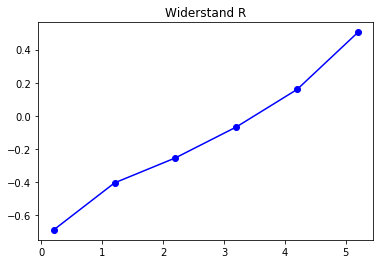

In [77]:
plt.plot(7.2-d[1:,0], np.log10(d[1:,1]),"b-o")
plt.title("Widerstand R")

Text(0.5,1,'Induktivität L')

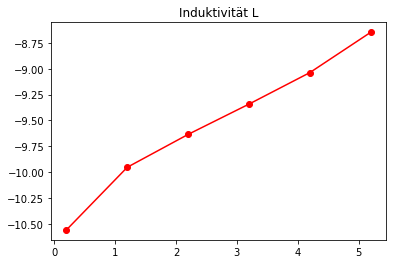

In [76]:
plt.plot(7.2-d[1:,0], np.log10(d[1:,2]),"r-o")
plt.title("Induktivität L")

Text(0.5,1,'Kapazität C')

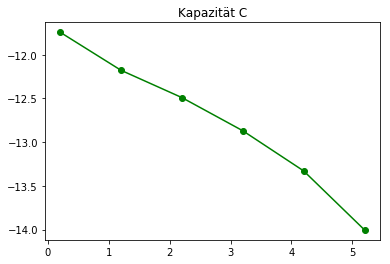

In [78]:
plt.plot(7.2-d[1:,0], np.log10(d[1:,3]),"g-o")
plt.title("Kapazität C")

In [73]:
data = np.loadtxt("/home/stefan/Arbeit/openEMS/metamaterials/Results/SParameters/RectCuAbsorber/UCDim_7.2/lz_1/S11__L_7_eps_4.6_kappa_0.05", delimiter=",")
f, S11, D, eps, tand = data[:,0], data[:,1]+1j*data[:,2], 0.15e-3, 4.6, 0.02

In [171]:
Nf = len(f)//5
print("f=%.2f" %(f[Nf]*1e-9))
my_func = lambda x: (fit_func(*x, f[0:Nf], D, eps, tand)-376)/(fit_func(*x, f[0:Nf], D, eps, tand)+376)
my_residuum = lambda x: (np.abs(my_func(x).real-S11[0:Nf].real)+np.abs(my_func(x).imag-S11[0:Nf].imag)).sum()
bounds = [(0.5, 1),(1e-16, 1e-14),(1e-13, 1e-11)]
sol = differential_evolution(my_residuum, bounds=bounds,popsize=100)

f=11.20


In [172]:
sol.x

array([  5.00758769e-01,   7.47746651e-15,   3.24940003e-12])

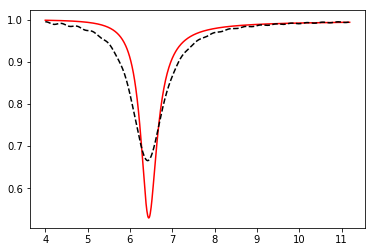

In [174]:
Zfit = fit_func(*sol.x, f, D, eps, tand)
Rfit = (Zfit-376)/(Zfit+376)
plt.plot(f[0:Nf]/1e9, np.abs(Rfit[0:Nf]), "r-")
plt.plot(f[0:Nf]/1e9, np.abs(S11[0:Nf]),"k--")

In [161]:
f[Nf]/1e9

In [19]:
help(fit_func)

Help on function fit_func in module tl_fit:

fit_func(R, L, C, f, D, eps, tand)
    A Simple RLC series circuit in
    parallel to the analytically known
    impedance of a grounded dielectric
    slab of thickness D

